In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'signal, arb.units')

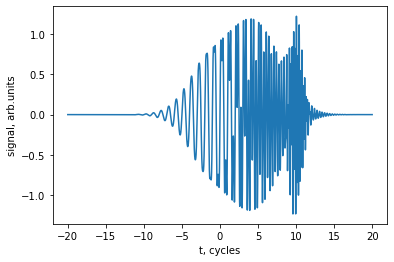

In [2]:
t = np.linspace(-20*2*np.pi, 20*2*np.pi, 3**9+6)
y = np.sin(t) * np.exp(-t**2/2/20**2) + \
    np.sin(3*t) * np.exp(-(t-5*2*np.pi)**2/2/20**2) + \
    np.sin(5.5*t) * np.exp(-(t-10*2*np.pi)**2/2/5**2)

plt.plot(t/2/np.pi, y)

plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

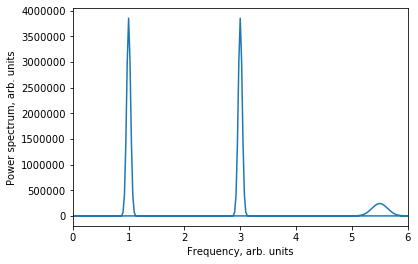

In [3]:
# Fourier spectrum
sp = np.fft.fft(y)
w = np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/np.pi)
plt.plot(w, abs(sp)**2)
plt.xlim(0, 6)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')

Text(0, 0.5, 'signal, arb.units')

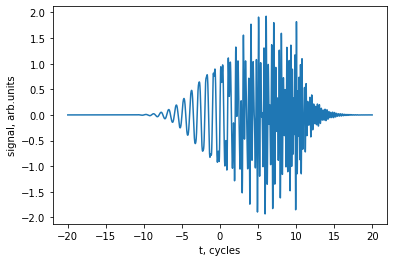

In [4]:
y_add = np.sin(4*t) * np.exp(-(t - 7*2*np.pi)**2 / (2 * 20**2))

plt.plot(t/2/np.pi, y + y_add)

plt.xlabel('t, cycles')
plt.ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

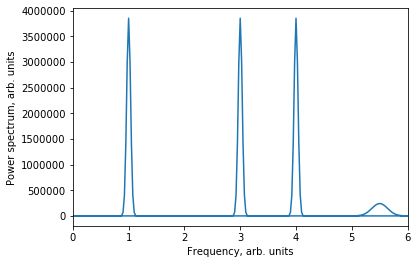

In [5]:
# Fourier spectrum
sp = np.fft.fft(y + y_add)
w = np.fft.fftfreq(len(y), d=(t[1]-t[0])/2/np.pi)
plt.plot(w, abs(sp)**2)
plt.xlim(0, 6)
plt.xlabel('Frequency, arb. units')
plt.ylabel('Power spectrum, arb. units')

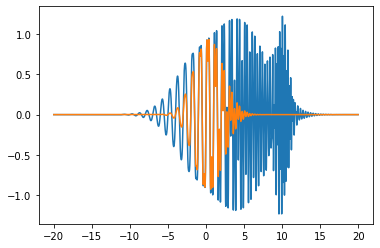

In [6]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width = 2.0 * 2 * np.pi
window_position = 0.0 * 2 * np.pi
window_function = np.exp(-(t-window_position)**2/2/window_width**2)

y_window = y * window_function

plt.plot(t/2/np.pi, y)
plt.plot(t/2/np.pi, y_window)

# """
# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum
# """

In [7]:
def get_specgram(y, t, nwindowsteps=1000):
    window_positions = np.linspace(-20*2*np.pi, 20*2*np.pi, nwindowsteps)
    specgram = np.zeros((len(t), len(window_positions)))
    window_width = 2.0 * 2 *np.pi

    for n, window_position in enumerate(window_positions):
        window_function = np.exp(-(t - window_position)**2 / (2 * window_width**2))
        specgram[:, n] = abs(np.fft.fft(y * window_function))

    return specgram

In [8]:
def plot_specgram(s, t, w, title=''):
    plt.figure()
    plt.imshow(s, aspect='auto', extent=[min(t) / (2*np.pi),
                                         max(t) / (2*np.pi),
                                         w[0],
                                         2 * w[int(len(w)/2)-1]])
    plt.ylim(0, 7)

    cbar = plt.colorbar()
    cbar.set_label('Power spectrum')
    plt.xlabel('Time, cycles')
    plt.ylabel('Frequency, arb. units')
    plt.title(title)

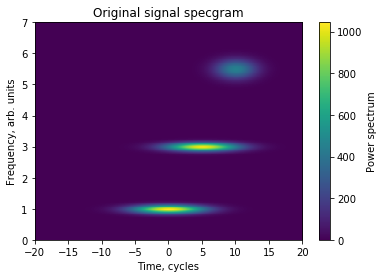

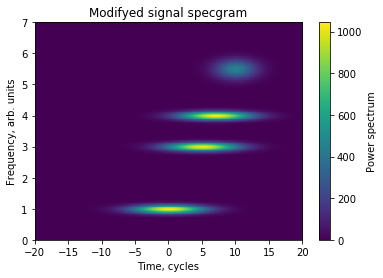

In [9]:
w = np.fft.fftfreq(len(y), d=(t[1]-t[0]) / (2*np.pi))

s = get_specgram(y, t)
plot_specgram(s, t, w, 'Original signal specgram')

s = get_specgram(y + y_add, t)
plot_specgram(s, t, w, 'Modifyed signal specgram')

# """
# Here are the 3D graphics. Lighter areas mean a higher power spectrum.
# The distribution (shift) of regions along the x-axis means that certain frequency components appear
# in different parts of the signal timeline.
# The y-axis positions show the frequencies of the sin terms in the signal.
# """

In [10]:

for num_of_steps in np.arange(-5, 6):
    t = np.linspace(-20*2*np.pi, 20*2*np.pi, 2**14 + int(num_of_steps)) 
    y = np.sin(t) * np.exp(-t**2 / (2 * 20**2)) + \
        np.sin(3*t) * np.exp(-(t - 5*2*np.pi)**2 / (2 * 20**2)) + \
        np.sin(5.5*t) * np.exp(-(t + 10*2*np.pi)**2 / (2 * 5**2))

    start_time = time.time()
    s = get_specgram(y, t)
    time_of_work = time.time() - start_time

    print(f"{num_of_steps = :>2d} + 2^14; {time_of_work = :.3f}s")

# """
# Fast Fourier transform is faster when the number of samples is 2^k, especially when k is even.
# The further the number of samples deviates from 2^14, there is a worse result.
# """

num_of_steps = -5 + 2^14; time_of_work = 2.369s
num_of_steps = -4 + 2^14; time_of_work = 0.717s
num_of_steps = -3 + 2^14; time_of_work = 2.358s
num_of_steps = -2 + 2^14; time_of_work = 2.465s
num_of_steps = -1 + 2^14; time_of_work = 1.509s
num_of_steps =  0 + 2^14; time_of_work = 0.671s
num_of_steps =  1 + 2^14; time_of_work = 1.326s
num_of_steps =  2 + 2^14; time_of_work = 2.787s
num_of_steps =  3 + 2^14; time_of_work = 2.817s
num_of_steps =  4 + 2^14; time_of_work = 2.798s
num_of_steps =  5 + 2^14; time_of_work = 2.811s


### With MPI

In [11]:
%%writefile task_06_spec_mpi.py

import time
import numpy as np

from mpi4py import MPI


comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

nwindowsteps = 3_000

window_positions = np.linspace(-20*2*np.pi, 20*2*np.pi, nwindowsteps, dtype=float)
t = np.linspace(-20*2*np.pi, 20*2*np.pi, 3**9+6)
y = np.sin(t) * np.exp(-t**2/2/20**2) + \
    np.sin(3*t) * np.exp(-(t-5*2*np.pi)**2/2/20**2) + \
    np.sin(5.5*t) * np.exp(-(t-10*2*np.pi)**2/2/5**2)
window_width = 2.0 * 2 *np.pi

calc_size = nwindowsteps // size

if rank == 0:
    specgram = np.zeros((t.size, window_positions.size), dtype=float)
else:
    specgram = None

rank_window_positions = window_positions[calc_size * rank:calc_size * rank + calc_size]
if rank == (size - 1):
    rank_window_positions = window_positions[calc_size * rank:]

ans = np.empty((t.size, rank_window_positions.size), dtype=float)
for n, window_position in enumerate(rank_window_positions):
    window_function = np.exp(-(t - window_position)**2 / (2 * window_width**2))
    ans[:, n] = abs(np.fft.fft(y * window_function))
ans = ans.reshape(-1)

sendcounts = np.array(comm.gather(ans.size, 0))

comm.Gatherv(sendbuf=ans, recvbuf=(specgram, sendcounts), root=0)

if rank == 0:
    specgram = specgram.reshape((t.size, window_positions.size))
    # print(specgram)

Overwriting task_06_spec_mpi.py


In [12]:
time_arr = []
for i in range(1, 19):
    print(f'{i} process(es)\n\t', end='')
    t = %timeit -o -r 3 !mpirun -n {i} --allow-run-as-root --mca btl ^vader python3 task_06_spec_mpi.py
    time_arr.append(t.best)

1 process(es)
	13.3 s ± 16.9 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
2 process(es)
	7.31 s ± 77 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
3 process(es)
	5.46 s ± 12.7 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
4 process(es)
	4.43 s ± 31 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
5 process(es)
	3.85 s ± 62.2 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
6 process(es)
	3.49 s ± 2.09 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
7 process(es)
	3.22 s ± 11.5 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
8 process(es)
	3.05 s ± 14.3 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
9 process(es)
	2.87 s ± 21.8 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
10 process(es)
	2.84 s ± 1.92 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
11 process(es)
	2.71 s ± 31.9 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
12 process(es)
	2.62 s ± 35.6 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
13 pr

Text(0.5, 0.98, 'Speedup vs Num of processes')

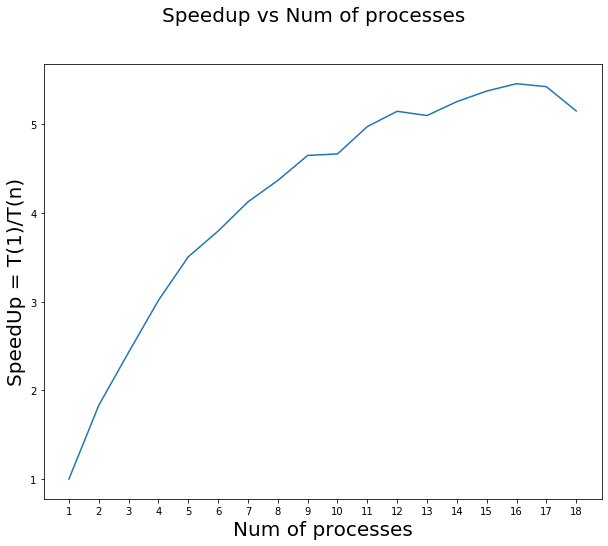

In [13]:
speedup = time_arr[0] / np.array(time_arr)
num_of_processes = range(1, 19)

plt.figure(figsize=(10, 8))
plt.plot(num_of_processes, speedup)
plt.xticks(num_of_processes)
plt.xlabel('Num of processes', fontsize=20)
plt.ylabel('SpeedUp = T(1)/T(n)', fontsize=20)
plt.suptitle('Speedup vs Num of processes', fontsize=20)